In [1]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",50)

np.random.seed(55)

In [2]:
# Reading Data

data = pd.read_csv('marketing_campaign.csv' , delimiter='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
## Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [8]:
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [9]:
data.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [10]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
data.dropna(inplace = True)

# Columns with null values dropped

In [14]:
data.shape

(2216, 29)

In [15]:
# Changing data type
data['Income'] = data['Income'].astype('int64')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   int64         
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [18]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
recent = np.max(data['Dt_Customer']).date()
old = np.min(data['Dt_Customer']).date()

print(f'Most recent purchase date is = {recent}\nOldest purchase date is = {old}')

Most recent purchase date is = 2014-12-06
Oldest purchase date is = 2012-01-08


In [20]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [21]:
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

# Education type changed to three categories

In [22]:
data['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [23]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
data['Marital_Status'] = data['Marital_Status'].replace({'Married':'Together' , 'Single':'Alone' , 'Divorced':'Alone' , 'Widow':'Alone' , 'Absurd':'Alone' , 'YOLO':'Alone'})

# Marital status changed into two categories

In [25]:
data['Marital_Status'].value_counts()

Together    1430
Alone        786
Name: Marital_Status, dtype: int64

In [26]:
# Making and Inserting necessary columns to the dataframe

In [27]:
data['Age'] = 2023 - data['Year_Birth']

In [28]:
data['Children']=data['Kidhome']+data['Teenhome']

In [29]:
data['Family_Size'] = data['Marital_Status'].replace({'Alone': 1, 'Together':2})+ data['Children']

In [30]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Size
0,5524,1957,Graduate,Alone,58138,0,0,2012-04-09,58,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,0,3,11,1,66,0,1
1,2174,1954,Graduate,Alone,46344,1,1,2014-08-03,38,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,3,11,0,69,2,3
2,4141,1965,Graduate,Together,71613,0,0,2013-08-21,26,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,3,11,0,58,0,2
3,6182,1984,Graduate,Together,26646,1,0,2014-10-02,26,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,3,11,0,39,1,3
4,5324,1981,Postgraduate,Together,58293,1,0,2014-01-19,94,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,3,11,0,42,1,3


In [31]:
# Checking the feature Recency

In [32]:
np.min(data['Recency'])

0

In [33]:
np.max(data['Recency'])

99

In [34]:
(data['Recency']<30).value_counts()

False    1530
True      686
Name: Recency, dtype: int64

In [35]:
(data['Recency']<14).value_counts()

False    1882
True      334
Name: Recency, dtype: int64

In [36]:
(data['Recency']<7).value_counts()

False    2045
True      171
Name: Recency, dtype: int64

In [37]:
# Feature Complain

In [38]:
data['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [39]:
# Making a new dataframe

In [40]:
new_data = data[['ID','Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Age','Children','Family_Size']]

In [41]:
new_data.head()

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Children,Family_Size
0,5524,Graduate,Alone,58138,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,66,0,1
1,2174,Graduate,Alone,46344,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,69,2,3
2,4141,Graduate,Together,71613,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,58,0,2
3,6182,Graduate,Together,26646,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,39,1,3
4,5324,Postgraduate,Together,58293,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,42,1,3


In [42]:
# Feature ID

In [43]:
new_data['ID'].value_counts()

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

In [44]:
new_data.isnull().any().any()

False

In [45]:
# box plot

In [46]:
# to chack the outlayers

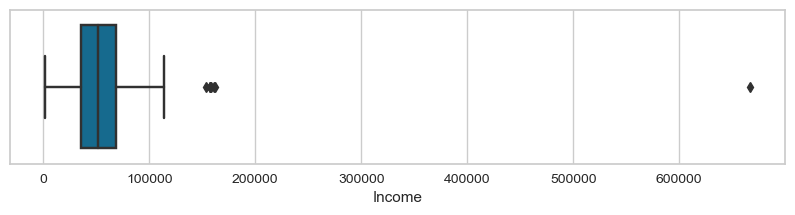

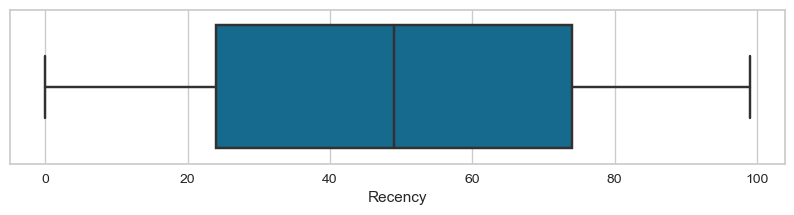

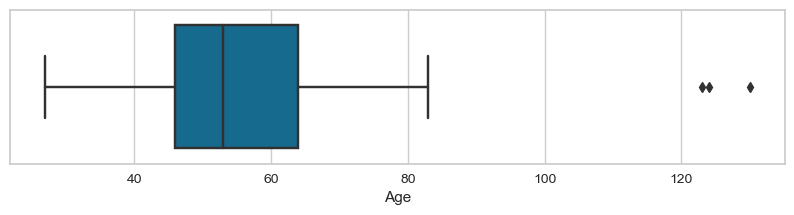

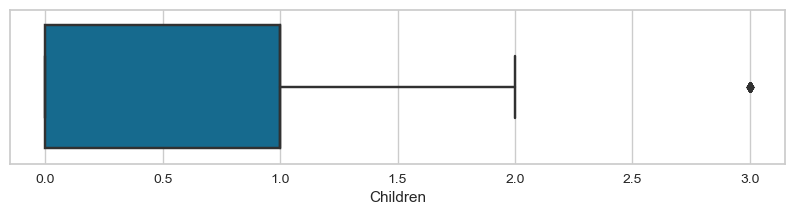

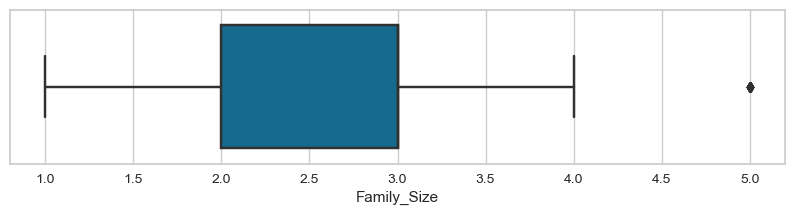

In [47]:
cols = ['Income','Recency','Age','Children','Family_Size']

for i in range(5):
    plt.figure(figsize=(10,2))
    sns.boxplot(data = new_data , x=cols[i])
    plt.show()

In [48]:
# From the above box plots we can clearly see that in Income and Age features have outlayers, so we have to remove the outlayers.
# And in Children and fa,ily size we can not say these are outlayers because one family can have 5 members and 3 childreds.

In [49]:
# Checking the records holding the outlayers

In [50]:
new_data[new_data['Income']>200000]

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Children,Family_Size
2233,9432,Graduate,Together,666666,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,46,1,3


In [51]:
new_data[new_data['Age']>90]

,ID,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Age,Children,Family_Size
192,7829,Undergraduate,Alone,36640,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,123,1,2
239,11004,Undergraduate,Alone,60182,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,130,1,2
339,1150,Postgraduate,Together,83532,36,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,124,0,2


In [52]:
new_data.shape[0]

2216

In [53]:
# There are only 4 records having outlayers, so we will remove them

In [54]:
new_data = new_data[~((new_data['Age']>90) | (new_data['Income']>200000))]

In [55]:
new_data.shape

(2212, 24)

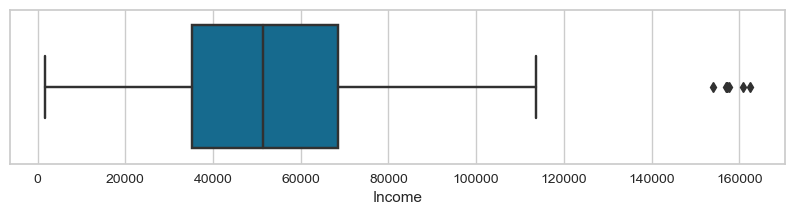

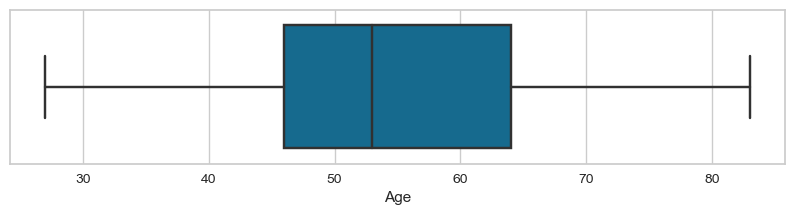

In [56]:
cols = ['Income','Age']

for i in range(2):
    plt.figure(figsize=(10,2))
    sns.boxplot(data = new_data , x=cols[i])
    plt.show()

In [57]:
# from the above box plot we can see in income feature there are some outlayers but we do not have to remove them because the values are not so high one can income within that range.

In [58]:
# descriptive statistics

In [59]:
# Purchase Items

items = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

new_data[items].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859
std,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [60]:
# Purchase through

pur_thr = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

new_data[pur_thr].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,2.324593,4.088156,2.672242,5.806510,5.321429
std,1.924507,2.742187,2.927542,3.250939,2.425597
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


In [61]:
# Accepted offers thorugh campaign

accpt_camp = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

new_data[pur_thr].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,2.324593,4.088156,2.672242,5.806510,5.321429
std,1.924507,2.742187,2.927542,3.250939,2.425597
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


In [62]:
# Making and Inserting some necessary columns

In [63]:
new_data['t_spent'] = new_data[items].sum(axis=1)

In [64]:
new_data['t_purchases'] = new_data[pur_thr].sum(axis=1)

In [65]:
new_data['t_acceptedCmp'] = new_data[accpt_camp].sum(axis=1)

In [66]:
# Making categorical value of features Age & Recency 

In [67]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

new_data['age_group'] = pd.cut(new_data['Age'], bins=age_bins, labels=age_labels)


In [68]:
rec_bins = [0, 7, 15, 30, 60, 90]
rec_labels = ['7 days', '15 days', '1 month', '2 month', '3 month']

new_data['recency_days'] = pd.cut(new_data['Recency'], bins=rec_bins, labels=rec_labels)

In [69]:
new_data.shape

(2212, 29)

In [70]:
new_data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Age', 'Children', 'Family_Size', 't_spent',
       't_purchases', 't_acceptedCmp', 'age_group', 'recency_days'],
      dtype='object')

In [71]:
# Making a dataframe for our Analysis

In [72]:
final_data = new_data[['Education', 'Marital_Status', 'Income', 'age_group', 'Age', 'Children', 'Family_Size', 
                       't_spent', 't_purchases', 't_acceptedCmp', 'recency_days', 'Recency']]

In [73]:
final_data.head()

,Education,Marital_Status,Income,age_group,Age,Children,Family_Size,t_spent,t_purchases,t_acceptedCmp,recency_days,Recency
0,Graduate,Alone,58138,60-80,66,0,1,1617,32,0,2 month,58
1,Graduate,Alone,46344,60-80,69,2,3,27,11,0,2 month,38
2,Graduate,Together,71613,40-60,58,0,2,776,25,0,1 month,26
3,Graduate,Together,26646,20-40,39,1,3,53,14,0,1 month,26
4,Postgraduate,Together,58293,40-60,42,1,3,422,24,0,NaN,94


In [74]:
# Changing columns name

final_data.columns = ['education', 'marital_status', 'income', 'age_group', 'age', 'children', 'family_size', 
                       't_spent', 't_purchases', 't_acceptedcmp', 'recency', 'recency_days']

In [75]:
final_data.shape

(2212, 12)

In [76]:
# Checking the unique values in the dataframe
final_data.nunique()

education            3
marital_status       2
income            1970
age_group            4
age                 56
children             4
family_size          5
t_spent           1047
t_purchases         41
t_acceptedcmp        5
recency              5
recency_days       100
dtype: int64

In [77]:
# Univariate Analysis

In [78]:
## Education

Numbers of Customers in each Educational Qualification:
 Graduate         1115
Postgraduate      845
Undergraduate     252
Name: education, dtype: int64


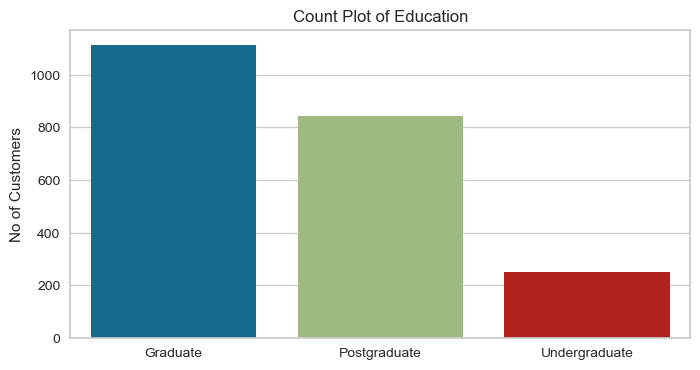

In [79]:
print('Numbers of Customers in each Educational Qualification:\n',final_data['education'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='education')
plt.title('Count Plot of Education')
plt.xlabel('')
plt.ylabel('No of Customers')
plt.show()

In [80]:
## Marital_Status

Numbers of Customers who are Alone or Together: 
 Together    1428
Alone        784
Name: marital_status, dtype: int64


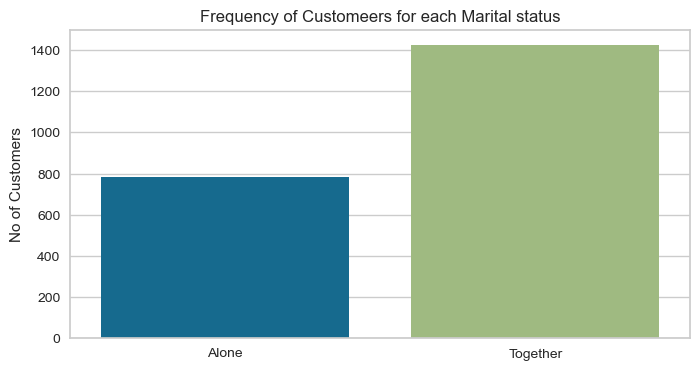

In [81]:
print('Numbers of Customers who are Alone or Together: \n',final_data['marital_status'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='marital_status')
plt.title('Frequency of Customeers for each Marital status')
plt.xlabel('')
plt.ylabel('No of Customers')
plt.show()

In [82]:
## Age

Below is the table of how many customers in each age group:
 0-20         0
20-40      298
40-60     1227
60-80      685
80-100       2
Name: age_group, dtype: int64


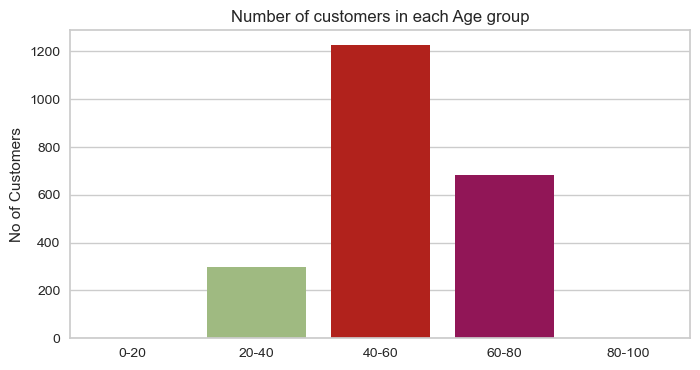

In [83]:
print('Below is the table of how many customers in each age group:\n',final_data['age_group'].value_counts(sort=False))

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='age_group')
plt.title('Number of customers in each Age group')
plt.xlabel('')
plt.ylabel('No of Customers')
plt.show()

In [84]:
## Childrens

Number of customers having 0, 1, 2 & 3 children:
 0     632
2     416
1    1114
3      50
Name: children, dtype: int64


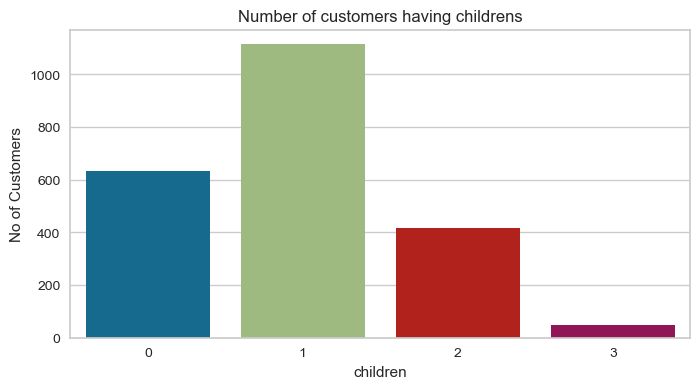

In [85]:
print('Number of customers having 0, 1, 2 & 3 children:\n',final_data['children'].value_counts(sort=False))

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='children')
plt.title('Number of customers having childrens')
# plt.xlabel('')
plt.ylabel('No of Customers')
plt.show()

In [86]:
## Family Size

Frequency of customers have family size: 
 3    879
2    754
4    296
1    252
5     31
Name: family_size, dtype: int64


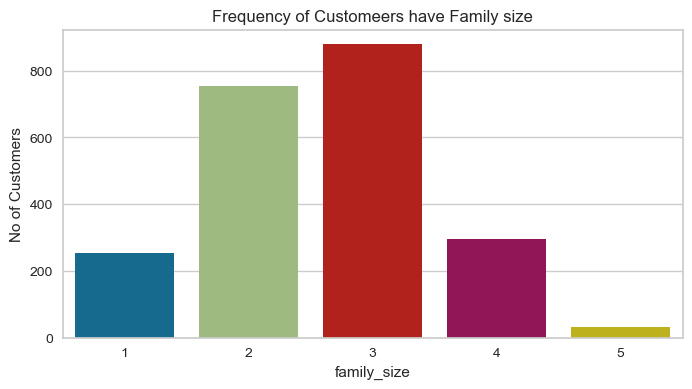

In [87]:
print('Frequency of customers have family size: \n',final_data['family_size'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='family_size')
plt.title('Frequency of Customeers have Family size')
# plt.xlabel('')
plt.ylabel('No of Customers')
plt.show()

In [88]:
## Recency

Frequency of customers based on the time intervals since their last purchase:
 3 month    655
2 month    647
1 month    347
15 days    186
7 days     155
Name: recency, dtype: int64


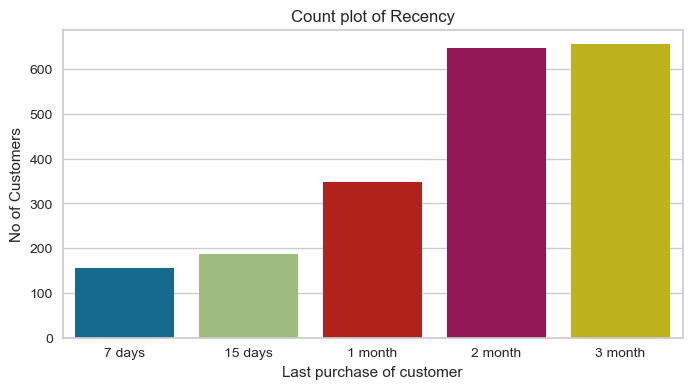

In [89]:
print('Frequency of customers based on the time intervals since their last purchase:\n',final_data['recency'].value_counts())

plt.figure(figsize=(8,4))
sns.countplot(data=final_data , x='recency')
plt.title('Count plot of Recency')
plt.xlabel('Last purchase of customer')
plt.ylabel('No of Customers')
plt.show()

In [90]:
# Distribution plot of some Features

In [91]:
## Income

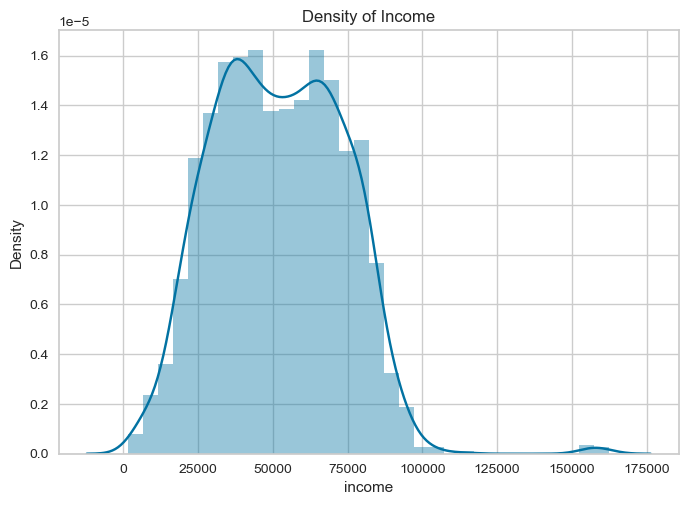

In [92]:
sns.distplot(final_data['income'])
plt.title('Density of Income')
plt.show()

In [93]:
# Records having skewed income value for the distribution
final_data[final_data['income']>125000]

,education,marital_status,income,age_group,age,children,family_size,t_spent,t_purchases,t_acceptedcmp,recency,recency_days
164,Postgraduate,Together,157243,40-60,50,1,3,1608,37,0,NaN,98
617,Postgraduate,Together,162397,40-60,47,2,4,107,2,0,2 month,31
655,Graduate,Alone,153924,40-60,48,0,1,6,0,0,3 month,81
687,Postgraduate,Together,160803,40-60,41,0,2,1717,44,0,1 month,21
1300,Postgraduate,Together,157733,40-60,52,1,3,59,3,0,2 month,37
1653,Graduate,Together,157146,40-60,46,0,2,1730,29,0,15 days,13
2132,Postgraduate,Together,156924,60-80,74,0,2,8,0,0,3 month,85


In [94]:
## Total Spent

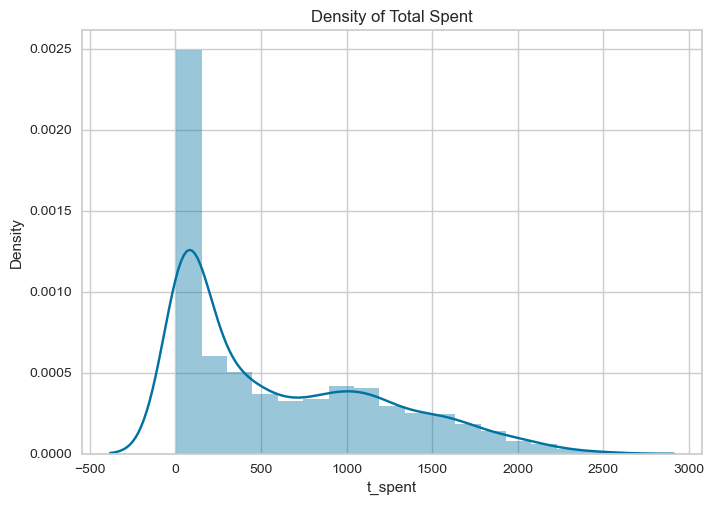

In [95]:
sns.distplot(final_data['t_spent'])
plt.title('Density of Total Spent')
plt.show()

In [96]:
## No of Purchases

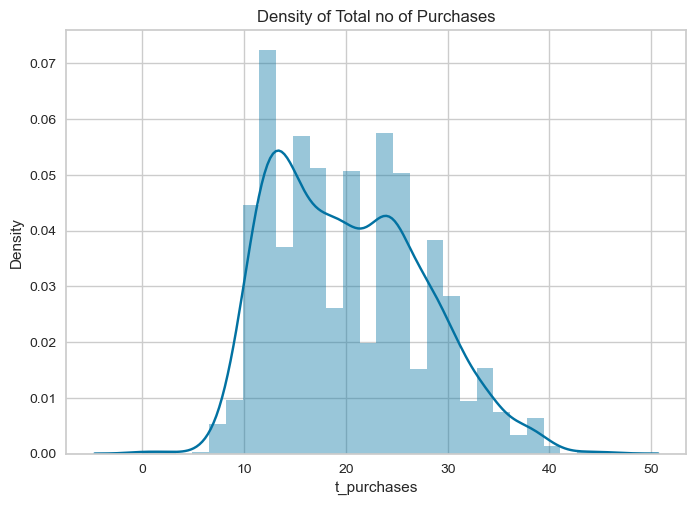

In [97]:
sns.distplot(final_data['t_purchases'])
plt.title('Density of Total no of Purchases')
plt.show()

In [98]:
## No of offers accepted through Campaign

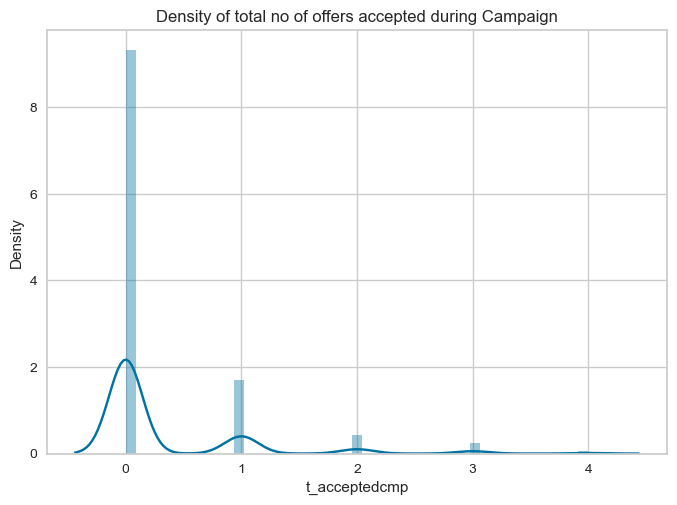

In [99]:
sns.distplot(final_data['t_acceptedcmp'])
plt.title('Density of total no of offers accepted during Campaign')
plt.show()

In [100]:
# Bivariate ANAlysis

In [101]:
final_data.columns

Index(['education', 'marital_status', 'income', 'age_group', 'age', 'children',
       'family_size', 't_spent', 't_purchases', 't_acceptedcmp', 'recency',
       'recency_days'],
      dtype='object')

In [102]:
'education', 'marital_status', 'age_group', 'children', 'family_size',

('education', 'marital_status', 'age_group', 'children', 'family_size')

In [103]:
## Education impact on Spent

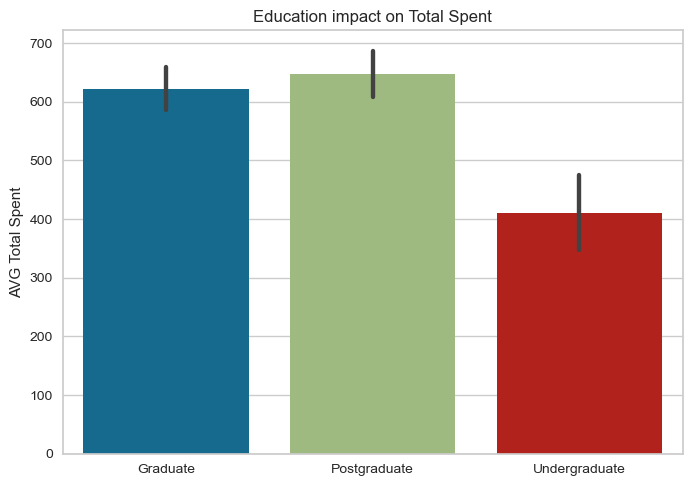

In [104]:
sns.barplot(data = final_data, x = 'education', y = 't_spent')
plt.title('Education impact on Total Spent')
plt.xlabel('')
plt.ylabel('AVG Total Spent')
plt.show()

In [105]:
## Marital Status impact on Spent

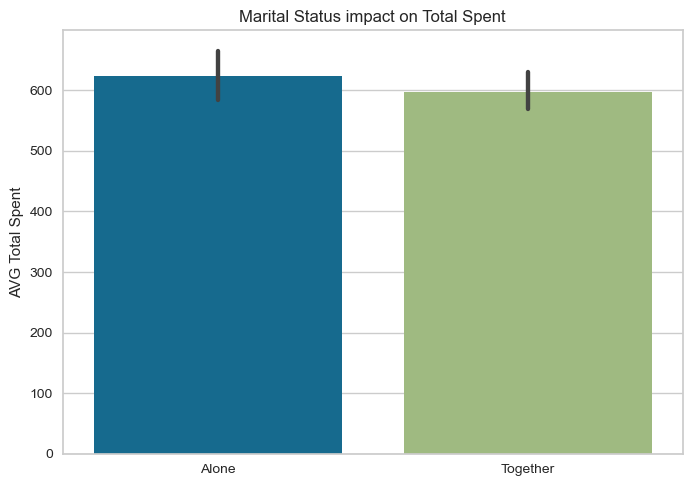

In [106]:
sns.barplot(data = final_data, x = 'marital_status', y = 't_spent')
plt.title('Marital Status impact on Total Spent')
plt.xlabel('')
plt.ylabel('AVG Total Spent')
plt.show()

In [107]:
## Age group impact on Spent

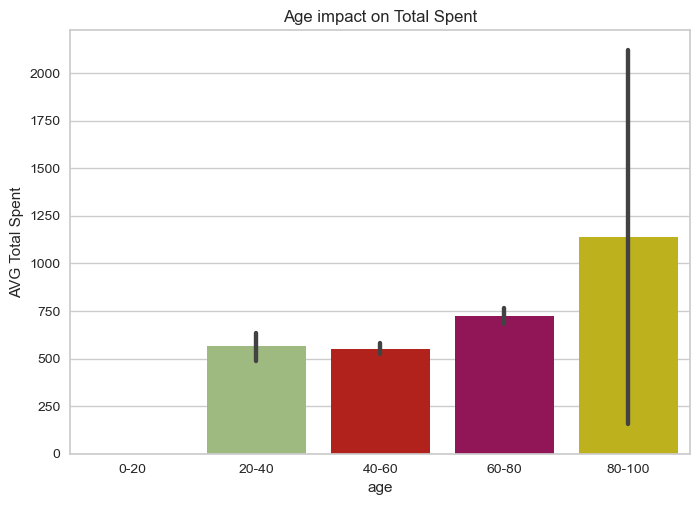

In [108]:
sns.barplot(data = final_data, x = 'age_group', y = 't_spent')
plt.title('Age impact on Total Spent')
plt.xlabel('age')
plt.ylabel('AVG Total Spent')
plt.show()

In [109]:
## Children impact on Spent

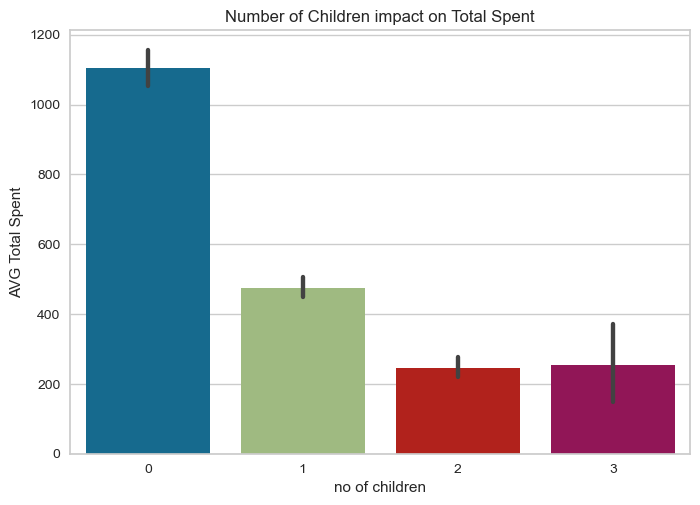

In [110]:
sns.barplot(data = final_data, x = 'children', y = 't_spent')
plt.title('Number of Children impact on Total Spent')
plt.xlabel('no of children')
plt.ylabel('AVG Total Spent')
plt.show()

In [111]:
## Family size impact on Spent

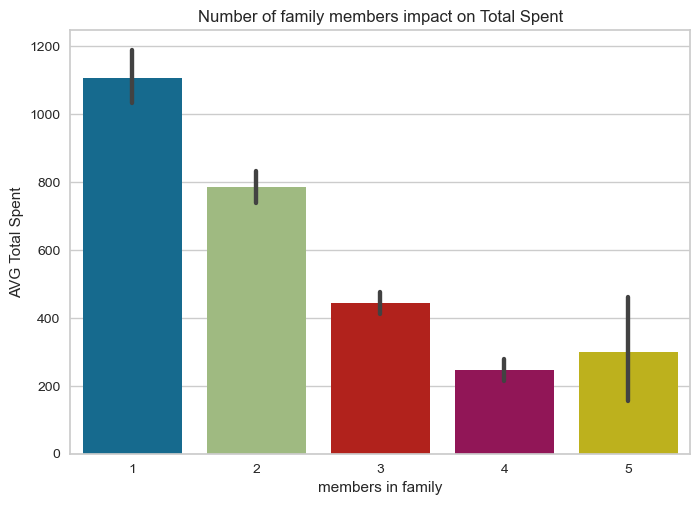

In [112]:
sns.barplot(data = final_data, x = 'family_size', y = 't_spent')
plt.title('Number of family members impact on Total Spent')
plt.xlabel('members in family')
plt.ylabel('AVG Total Spent')
plt.show()

In [113]:
'income', 't_purchases', 't_acceptedcmp'

('income', 't_purchases', 't_acceptedcmp')

In [114]:
## Income impact on Spent

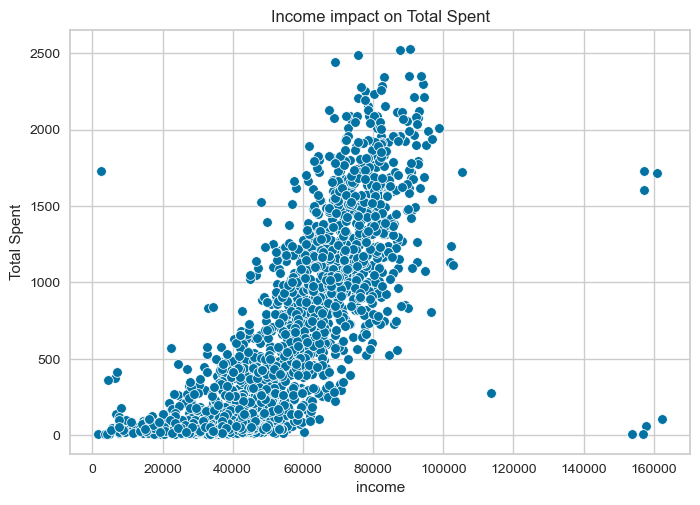

In [115]:
sns.scatterplot(data = final_data, x = 'income', y = 't_spent')
plt.title('Income impact on Total Spent')
plt.xlabel('income')
plt.ylabel('Total Spent')
plt.show()

In [116]:
## Total number of Purchases impact on Spent

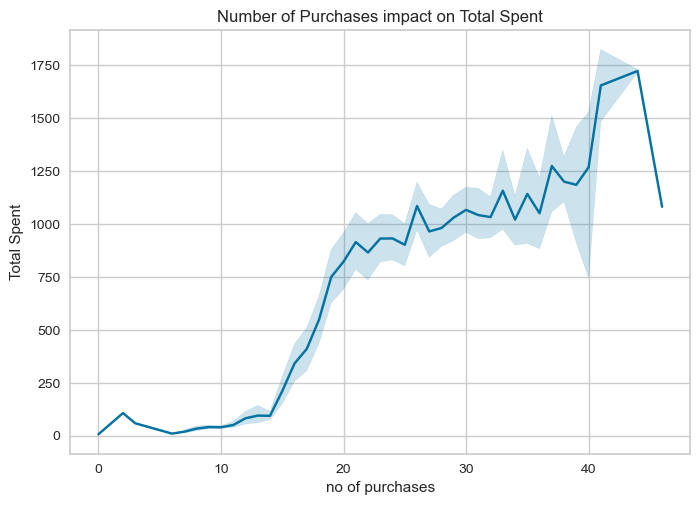

In [117]:
sns.lineplot(data = final_data, x = 't_purchases', y = 't_spent')
plt.title('Number of Purchases impact on Total Spent')
plt.xlabel('no of purchases')
plt.ylabel('Total Spent')
plt.show()

In [118]:
## Total offers accepted through campaign impact on Spent

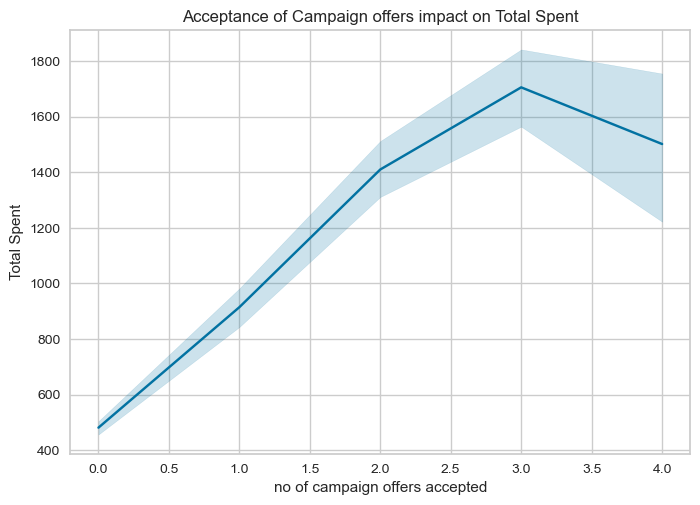

In [119]:
sns.lineplot(data = final_data, x = 't_acceptedcmp', y = 't_spent')
plt.title('Acceptance of Campaign offers impact on Total Spent')
plt.xlabel('no of campaign offers accepted')
plt.ylabel('Total Spent')
plt.show()

In [120]:
# Correlation

In [121]:
ana_data = final_data[['t_spent', 'income', 'age', 'children','family_size', 't_purchases', 't_acceptedcmp']]

In [122]:
ana_data.head()

,t_spent,income,age,children,family_size,t_purchases,t_acceptedcmp
0,1617,58138,66,0,1,32,0
1,27,46344,69,2,3,11,0
2,776,71613,58,0,2,25,0
3,53,26646,39,1,3,14,0
4,422,58293,42,1,3,24,0


In [123]:
### Descriptive Statistics

In [124]:
ana_data.describe().T

,count,mean,std,min,25%,50%,75%,max
t_spent,2212.0,607.268083,602.513364,5.0,69.0,397.0,1048.0,2525.0
income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.0,162397.0
age,2212.0,54.086347,11.701599,27.0,46.0,53.0,64.0,83.0
children,2212.0,0.947559,0.749466,0.0,0.0,1.0,1.0,3.0
family_size,2212.0,2.593128,0.906236,1.0,2.0,3.0,3.0,5.0
t_purchases,2212.0,20.212929,7.281654,0.0,14.0,19.0,25.0,46.0
t_acceptedcmp,2212.0,0.298373,0.679570,0.0,0.0,0.0,0.0,4.0


In [125]:
## finding correlation co-efficient

In [126]:
ana_data.corr().style.background_gradient(cmap = sns.diverging_palette(10, 150, as_cmap=True))

,t_spent,income,age,children,family_size,t_purchases,t_acceptedcmp
t_spent,1.000000,0.792740,0.115901,-0.499931,-0.424497,0.631266,0.456456
income,0.792740,1.000000,0.199977,-0.343529,-0.286638,0.489710,0.365986
age,0.115901,0.199977,1.000000,0.092676,0.078593,0.151181,0.001878
children,-0.499931,-0.343529,0.092676,1.000000,0.849574,-0.125168,-0.245440
family_size,-0.424497,-0.286638,0.078593,0.849574,1.000000,-0.100435,-0.203037
t_purchases,0.631266,0.489710,0.151181,-0.125168,-0.100435,1.000000,0.215290
t_acceptedcmp,0.456456,0.365986,0.001878,-0.245440,-0.203037,0.215290,1.000000


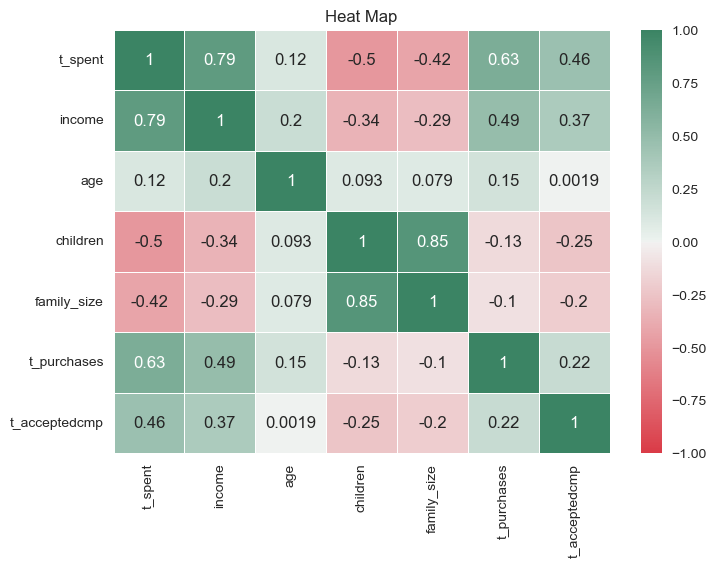

In [127]:
cmap = sns.diverging_palette(10, 150, as_cmap=True)
sns.heatmap(ana_data.corr(), annot = True, linewidths=.7, cmap = cmap, vmin=-1)
plt.title('Heat Map')
plt.show()

In [128]:
ana_data.corr()

,t_spent,income,age,children,family_size,t_purchases,t_acceptedcmp
t_spent,1.000000,0.792740,0.115901,-0.499931,-0.424497,0.631266,0.456456
income,0.792740,1.000000,0.199977,-0.343529,-0.286638,0.489710,0.365986
age,0.115901,0.199977,1.000000,0.092676,0.078593,0.151181,0.001878
children,-0.499931,-0.343529,0.092676,1.000000,0.849574,-0.125168,-0.245440
family_size,-0.424497,-0.286638,0.078593,0.849574,1.000000,-0.100435,-0.203037
t_purchases,0.631266,0.489710,0.151181,-0.125168,-0.100435,1.000000,0.215290
t_acceptedcmp,0.456456,0.365986,0.001878,-0.245440,-0.203037,0.215290,1.000000


In [129]:
rel = pd.DataFrame(ana_data.corr().iloc[0])
rel

,t_spent
t_spent,1.000000
income,0.792740
age,0.115901
children,-0.499931
family_size,-0.424497
t_purchases,0.631266
t_acceptedcmp,0.456456


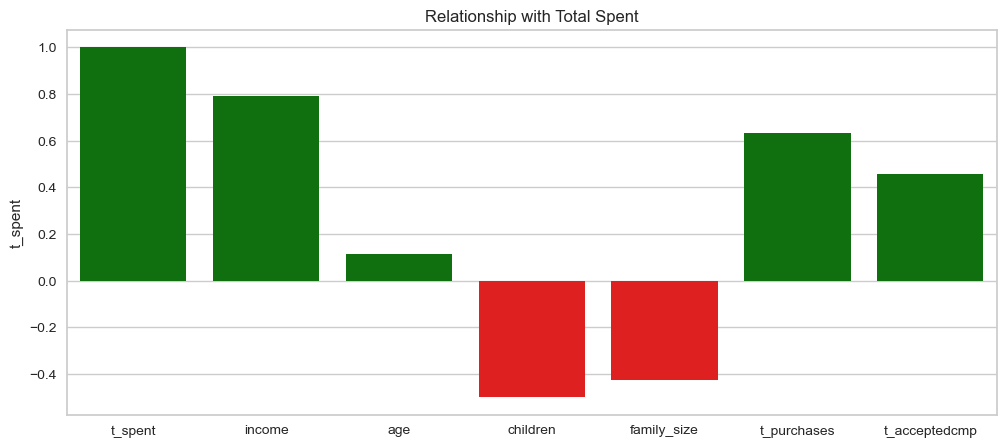

In [130]:
plt.figure(figsize=(12,5))
colors = ['green' if i > 0 else 'red' for i in rel['t_spent']]
sns.barplot(x = rel.index,y = rel['t_spent'], palette = colors)
plt.title('Relationship with Total Spent')
plt.show()

In [131]:
# Scalling

In [132]:
#Scaling
scaler = StandardScaler()
scaler.fit(ana_data)
scaled_data = pd.DataFrame(scaler.transform(ana_data),columns= ana_data.columns )
scaled_data.head()

,t_spent,income,age,children,family_size,t_purchases,t_acceptedcmp
0,1.676245,0.287105,1.018352,-1.264598,-1.758359,1.619101,-0.43916
1,-0.963297,-0.260882,1.274785,1.404572,0.449070,-1.265511,-0.43916
2,0.280110,0.913196,0.334530,-1.264598,-0.654644,0.657564,-0.43916
3,-0.920135,-1.176114,-1.289547,0.069987,0.449070,-0.853423,-0.43916
4,-0.307562,0.294307,-1.033114,0.069987,0.449070,0.520201,-0.43916


In [133]:
# Principal component analysis (PCA)

In [134]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns=(['col_1','col_2', 'col_3']))

In [135]:
x =pca_data['col_1']
y =pca_data['col_2']
z =pca_data['col_3']

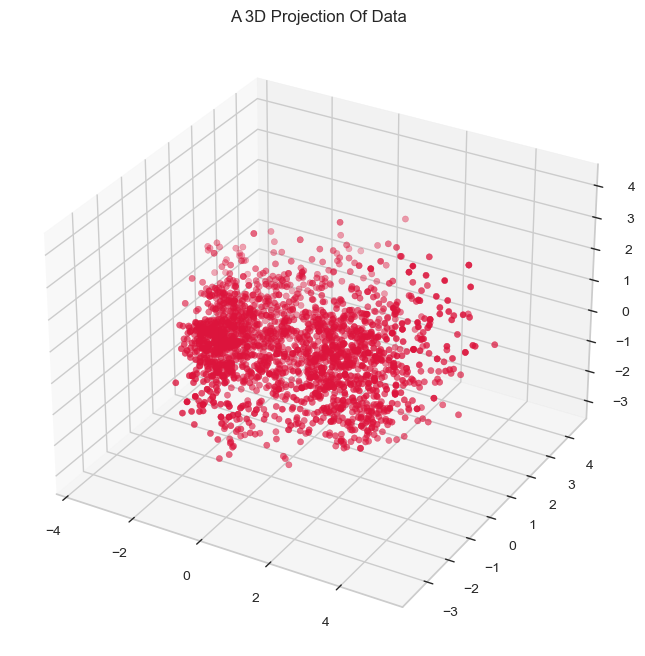

In [136]:
# A 3D Projection Of Data In The Reduced Dimension

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='crimson', marker='o')
ax.set_title('A 3D Projection Of Data')
plt.show()

In [137]:
# Clustering

In [138]:
## elbow method to find numbers of clusters to make

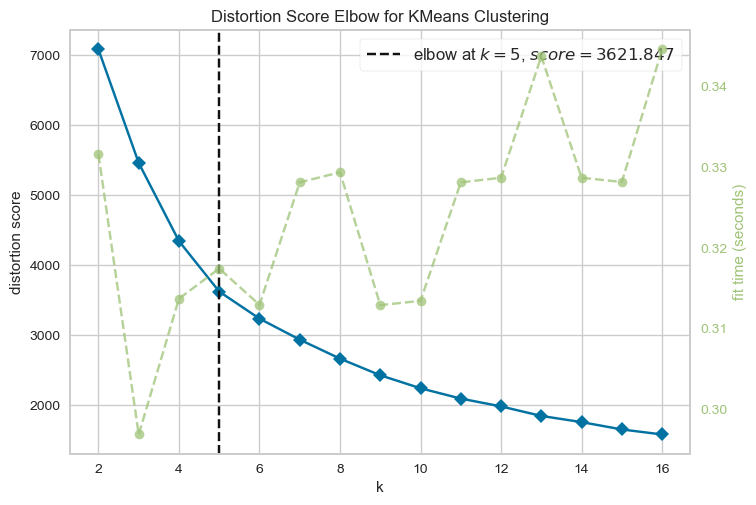

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [139]:
elbow = KElbowVisualizer(KMeans(), k=16)
elbow.fit(pca_data)
elbow.show()

In [140]:
# So we have Cluster size
k=5

In [141]:
## K-Means Clustering

In [142]:
kmeans = KMeans(n_clusters =k , init = 'k-means++', random_state = 55)
clusters_km = kmeans.fit_predict(pca_data)

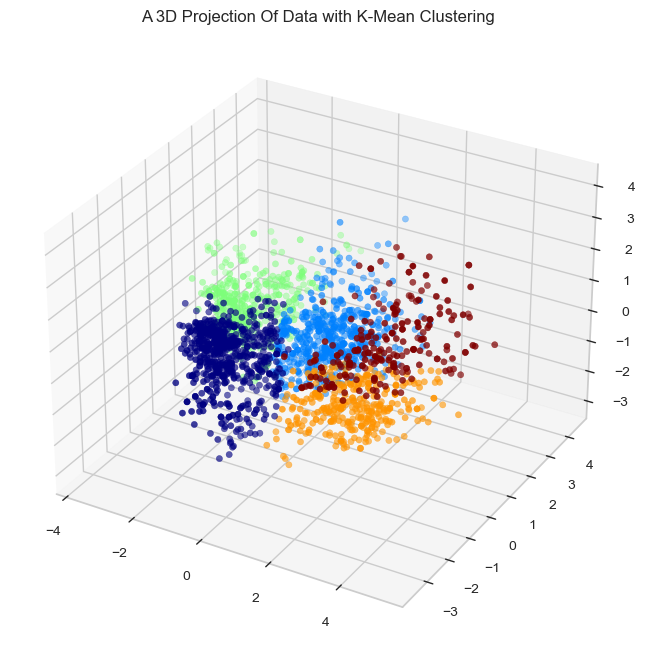

In [195]:
# 3D Projection Of Data with K-Mean Clustering
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = clusters_km, marker = 'o', cmap = cmap)
ax.set_title('A 3D Projection Of Data with K-Mean Clustering')
plt.show()

In [144]:
# print(plt.colormaps())

In [145]:
## Agglomerative Clustering

In [146]:
ac = AgglomerativeClustering(n_clusters=k)
clusters_ac = ac.fit_predict(pca_data)

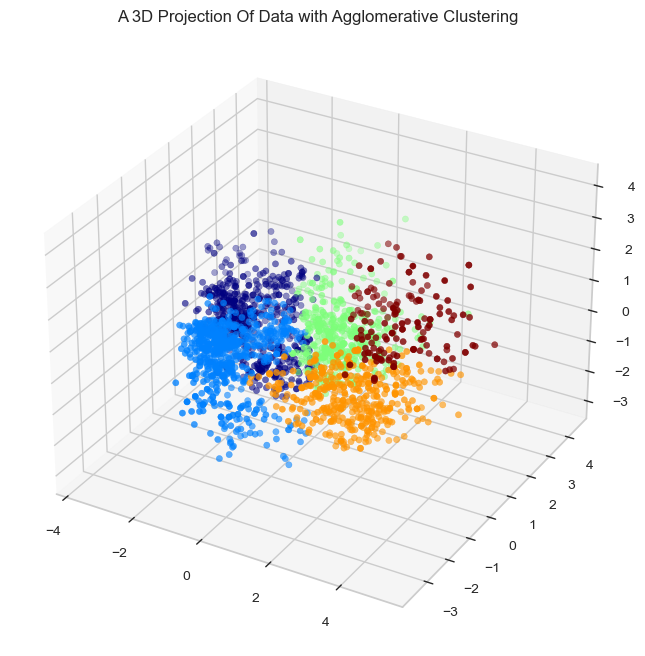

In [196]:
# 3D Projection Of Data with the Agglomerative Clustering model 
cmap = plt.get_cmap('jet')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = clusters_ac, marker = 'o', cmap = cmap)
ax.set_title('A 3D Projection Of Data with Agglomerative Clustering')
plt.show()

In [148]:
silhouette_km = silhouette_score(pca_data, clusters_km)
silhouette_ac = silhouette_score(pca_data, clusters_ac)

print(f'Silhouette_Score of our data with K-Means Clustering is {(silhouette_km)}')
print(f'Silhouette_Score of our data with Agglomerative Clustering is {(silhouette_ac)}')

Silhouette_Score of our data with K-Means Clustering is 0.3471501734186472
Silhouette_Score of our data with Agglomerative Clustering is 0.2997070311223394


In [149]:
# Clustering with features Income and Total Spent without PCA

In [150]:
sp_in_data = scaled_data[['income', 't_spent']]

In [151]:
sp_in_data.head()

,income,t_spent
0,0.287105,1.676245
1,-0.260882,-0.963297
2,0.913196,0.280110
3,-1.176114,-0.920135
4,0.294307,-0.307562


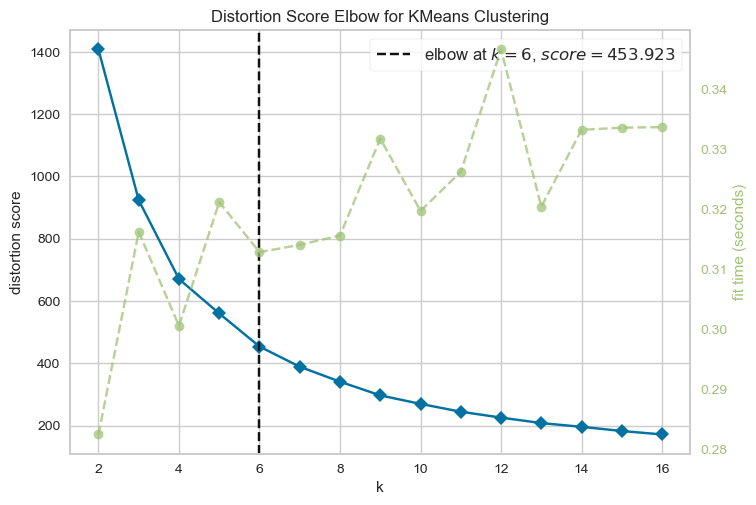

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
elbow = KElbowVisualizer(KMeans(), k=16)
elbow.fit(sp_in_data)
elbow.show()

In [153]:
k1 = 6

In [154]:
kmeans = KMeans(n_clusters =k1 , init = 'k-means++', random_state = 55)
clusters_km1 = kmeans.fit_predict(sp_in_data)

In [155]:
silhouette_km1 = silhouette_score(sp_in_data, clusters_km1)
silhouette_km1

0.4122989224272752

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


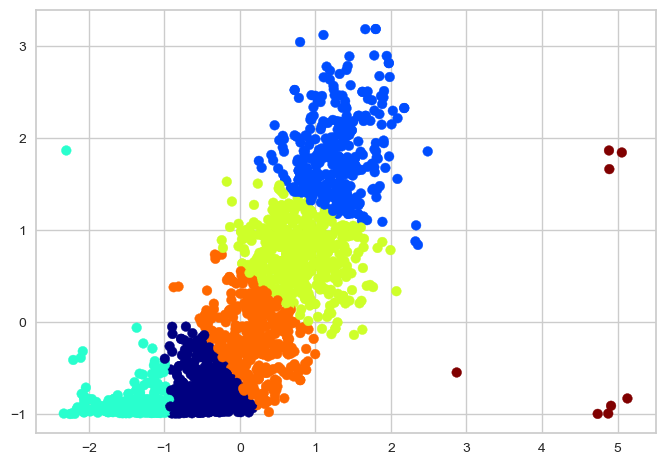

In [189]:
x1 = sp_in_data['income']
y1 = sp_in_data['t_spent']
plt.scatter(x1, y1, c = clusters_km1, marker = 'o', cmap = cmap)
plt.show()

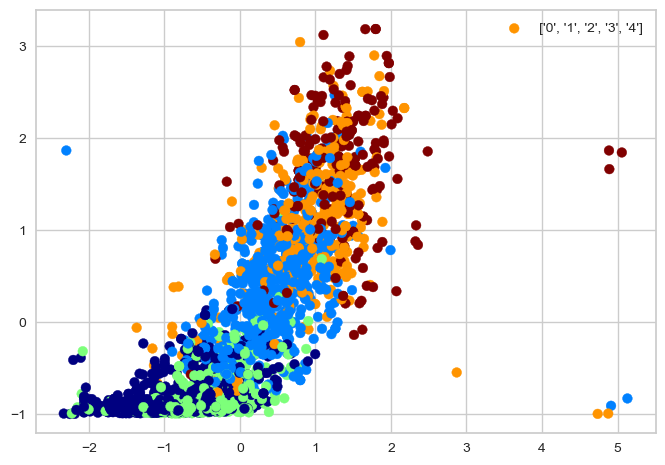

In [191]:
plt.scatter(x1, y1, c = clusters_km, marker = 'o', cmap = cmap, label = ['0', '1', '2', '3', '4'])
plt.legend()
plt.show()

In [158]:
# Analysing Clusters

In [172]:
# Adding the K-Mean Clusters to the data frame

# final_data['clusters'] = clusters_km
final_data.head()

,education,marital_status,income,age_group,age,children,family_size,t_spent,t_purchases,t_acceptedcmp,recency,recency_days,clusters
0,Graduate,Alone,58138,60-80,66,0,1,1617,32,0,2 month,58,3
1,Graduate,Alone,46344,60-80,69,2,3,27,11,0,2 month,38,2
2,Graduate,Together,71613,40-60,58,0,2,776,25,0,1 month,26,3
3,Graduate,Together,26646,20-40,39,1,3,53,14,0,1 month,26,0
4,Postgraduate,Together,58293,40-60,42,1,3,422,24,0,NaN,94,1


In [186]:
final_data['clusters'].value_counts()

0    701
1    555
2    413
3    328
4    215
Name: clusters, dtype: int64

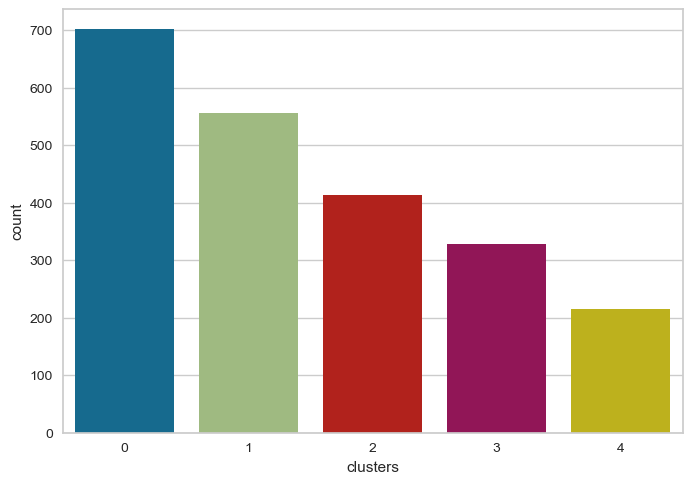

In [230]:
sns.countplot(x = final_data['clusters'])
plt.show()

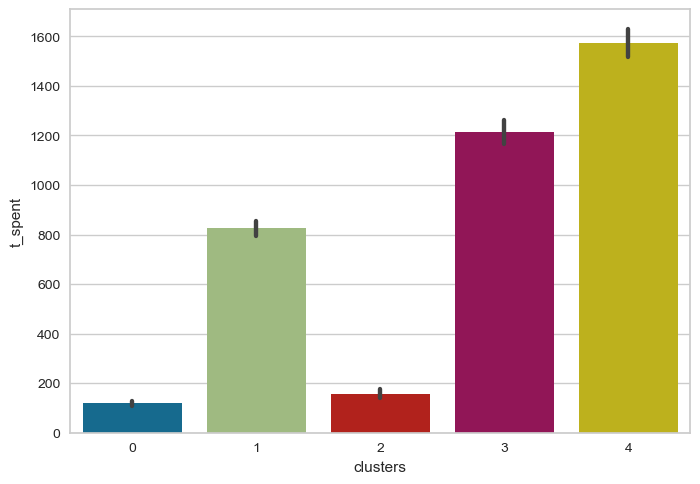

In [229]:
sns.barplot(x = final_data['clusters'], y = final_data['t_spent'])
plt.show()

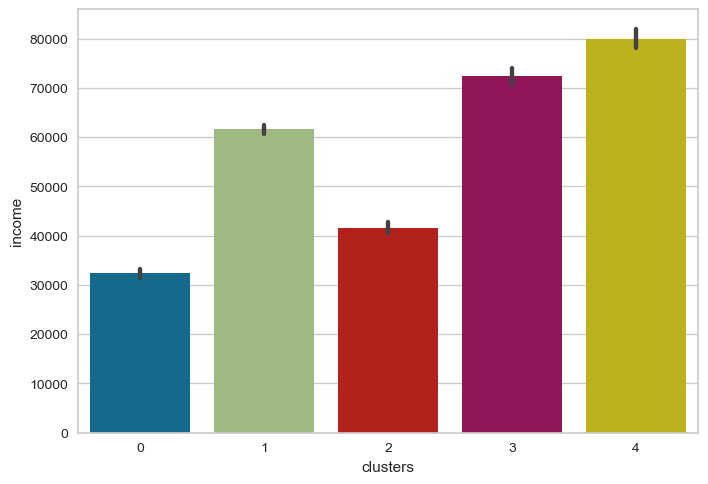

In [228]:
sns.barplot(x = final_data['clusters'], y = final_data['income'])
plt.show()

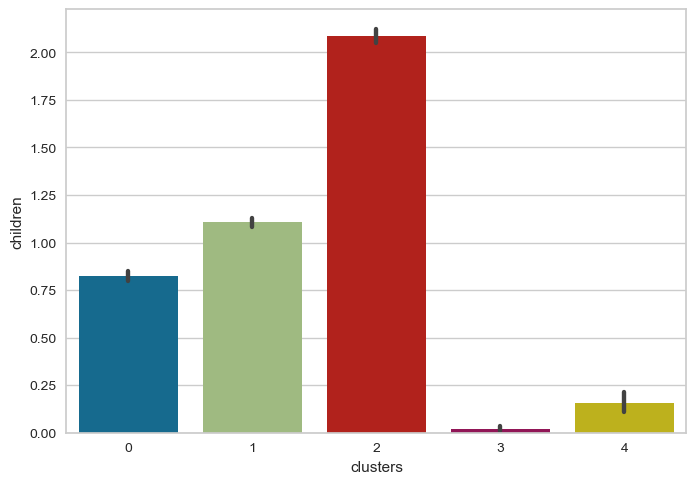

In [232]:
sns.barplot(x = final_data['clusters'], y = final_data['children'])
plt.show()

In [237]:
final_data['children'].value_counts()

1    1114
0     632
2     416
3      50
Name: children, dtype: int64

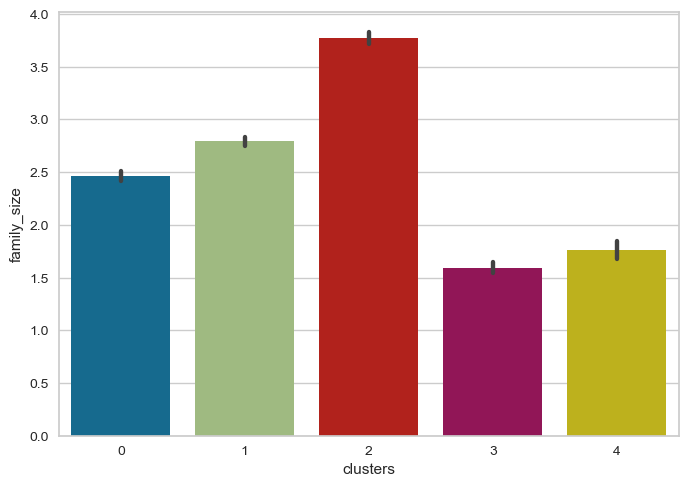

In [227]:
sns.barplot(x = final_data['clusters'], y = final_data['family_size'])
plt.show()

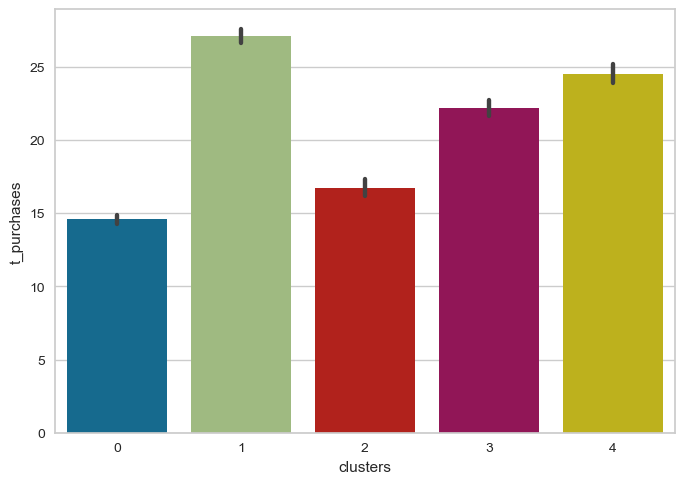

In [226]:
sns.barplot(x = final_data['clusters'], y = final_data['t_purchases'])
plt.show()

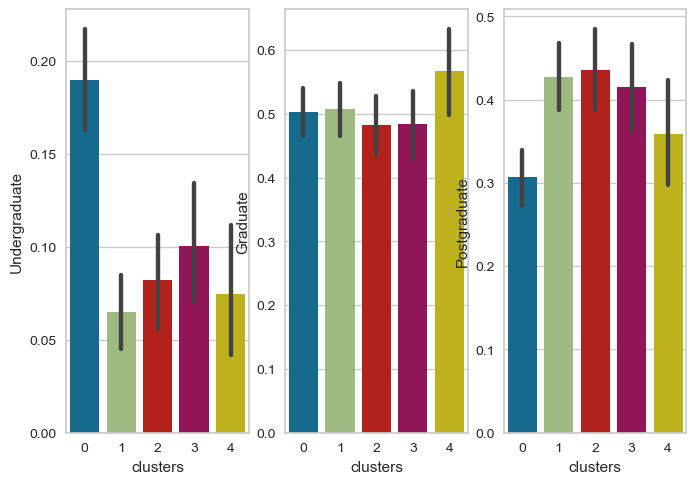

In [225]:
f, ax = plt.subplots(1,3)

sns.barplot(x = final_data['clusters'], y = final_data['education']=='Undergraduate', ax=ax[0])
sns.barplot(x = final_data['clusters'], y = final_data['education']=='Graduate', ax=ax[1])
sns.barplot(x = final_data['clusters'], y = final_data['education']=='Postgraduate', ax=ax[2])

ax[0].set_ylabel('Undergraduate')
ax[1].set_ylabel('Graduate')
ax[2].set_ylabel('Postgraduate')

plt.show()

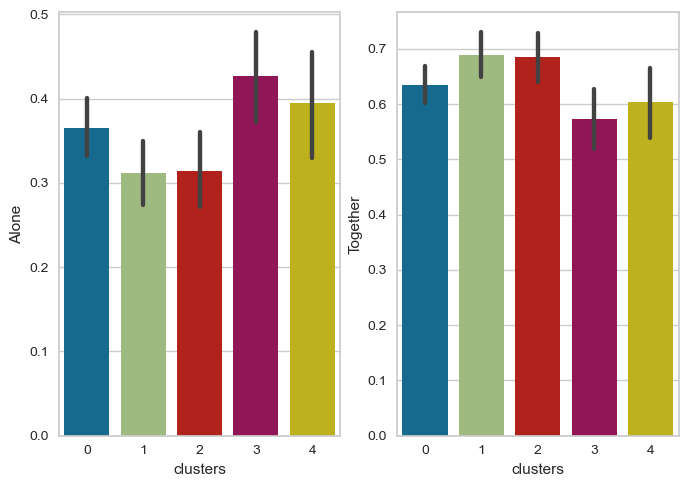

In [231]:
f, ax = plt.subplots(1,2)

sns.barplot(x = final_data['clusters'], y = final_data['marital_status']=='Alone', ax=ax[0])
sns.barplot(x = final_data['clusters'], y = final_data['marital_status']=='Together', ax=ax[1])

ax[0].set_ylabel('Alone')
ax[1].set_ylabel('Together')

plt.show()